In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mth
import collections as colls
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
%matplotlib inline

In [2]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

In [3]:
def sinyy(x):
    return sum([(np.power(x, y) * np.power(-1, (y - 1) / 2)) / mth.factorial(y)  for y in (2 * x - 1 for x in range(1, 12))])

In [4]:
def xsinyy(x):
    return sum([(np.power(x, y+1) * np.power(-1, (y - 1) / 2)) / mth.factorial(y)  for y in (2 * x - 1 for x in range(1, 12))])

In [5]:
def MakePolyRidgeModel(degree:int, ridgeAlpha:float, points_x:list, points_y:list):
    pfs = PolynomialFeatures(degree)
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=ridgeAlpha))
    # model.fit wants the x points in the form of a 2d n by 1 numpy array, and the y points
    # a 1d length n numpy array. Go figure.
    model.fit(points_x[:, np.newaxis], points_y)
    return model

In [6]:
def ModelScore(correct, to_eval):
    marg = 150
    return np.log(np.linalg.norm(correct - to_eval))

In [7]:
def OneOver(x):
    return sum([np.power(x, t) for t in range(0, 14)])

In [8]:
def macExp(x, deg):
    return sum([np.power(x, t) / mth.factorial(t) for t in range(0, deg + 1)])

In [9]:
AlphaDegree = colls.namedtuple("AlphaDegree", ["degree", "ridgeAlpha"])

In [10]:
(AlphaDegree(1,2), AlphaDegree(3,4))

(AlphaDegree(degree=1, ridgeAlpha=2), AlphaDegree(degree=3, ridgeAlpha=4))

In [11]:
goof = np.array([1,2,3])
goofer = np.array([-6,-3, 3])
bingo = MakePolyRidgeModel(6, 1, goof, goofer)

In [12]:
linewidth = 2
strideX = 1000
minX = -15
maxX = 15
minY = -15
maxY = 15
xPix = np.linspace(minX, maxX, strideX)

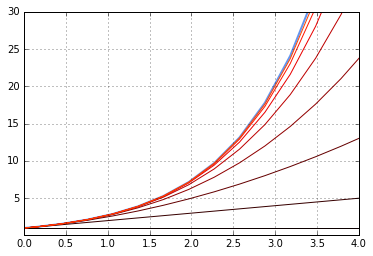

In [13]:
import matplotlib.cm as cm
strideX = 100
xMin = 0
xMax = 4
xPix = np.linspace(minX, maxX, strideX)
fig, ax = plt.subplots()
ax.set_xlim(xMin, xMax)
ax.set_ylim(0.1, 30)
# plt.yscale('log')
ax.grid()
plt.plot(xPix, np.exp(xPix), color='cornflowerblue', linewidth=linewidth, label="ground truth")
for deg in [0, 1, 2, 3, 4, 5, 6, 7]: #, 4, 6, 8, 10, 12, 14
    plt.plot(xPix, macExp(xPix, deg), color=cm.hot(deg/15), linewidth=1, label="ground truth")
plt.show()

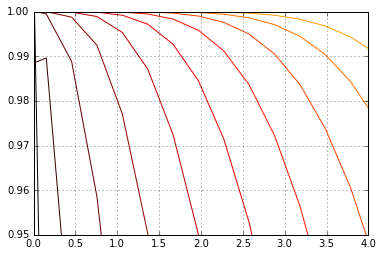

In [14]:
strideX = 100
xMin = 0
xMax = 4
xPix = np.linspace(minX, maxX, strideX)
fig, ax = plt.subplots()
ax.set_xlim(xMin, xMax)
ax.set_ylim(0.95, 1)
# plt.yscale('log')
ax.grid()
#plt.plot(xPix, 1, color='cornflowerblue', linewidth=linewidth, label="ground truth")
for deg in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]: #, 4, 6, 8, 10, 12, 14
    plt.plot(xPix, macExp(xPix, deg) / np.exp(xPix), color=cm.hot(deg/15), linewidth=1, label="ground truth")
plt.show()

#### sample points

In [15]:
minSampX = -10
maxSampX = 10
numSamples = 50
x = np.linspace(minSampX, maxSampX, 100)
rng = np.random.RandomState(131)
rng.shuffle(x)
sample_x = np.sort(x[:numSamples])
sample_y = f(sample_x)

#### prediction points

In [16]:
minPredictX = -15
maxPredictX = 15
minPdex = int(strideX * ( minPredictX - minX ) / (maxX - minX))
maxPdex = int(strideX * ( maxPredictX - minX ) / (maxX - minX))
predictionPtsX = xPix[minPdex:maxPdex, np.newaxis]
correctPrediction = f(xPix)[minPdex:maxPdex]

In [17]:
degree = 20

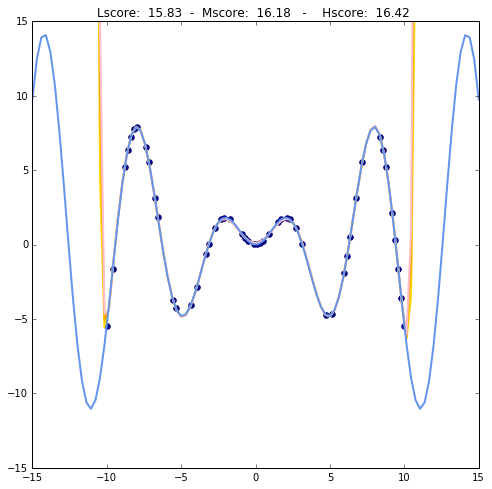

In [18]:
plt.figure(figsize=(8, 8))
axes = plt.gca()
axes.set_xlim([minX, maxX])
axes.set_ylim([minY, maxY])
plt.gca().set_aspect('equal', adjustable='box')

mSa = MakePolyRidgeModel(degree=degree, ridgeAlpha=0.4, points_x=sample_x, points_y=sample_y)
predictionPtsYSa = mSa.predict(predictionPtsX)

mMa = MakePolyRidgeModel(degree=degree, ridgeAlpha=0.6, points_x=sample_x, points_y=sample_y)
predictionPtsYMa = mMa.predict(predictionPtsX)

mLa = MakePolyRidgeModel(degree=degree, ridgeAlpha=0.8, points_x=sample_x, points_y=sample_y)
predictionPtsYLa = mLa.predict(predictionPtsX)

Lscore = ModelScore(predictionPtsYSa, correctPrediction)
Mscore = ModelScore(predictionPtsYMa, correctPrediction)
Hscore = ModelScore(predictionPtsYLa, correctPrediction)

plt.plot(predictionPtsX, predictionPtsYSa, color='gold', linewidth=linewidth, label="degree %d" % degree)
plt.plot(predictionPtsX, predictionPtsYMa, color='orange', linewidth=linewidth, label="degree %d" % degree)
plt.plot(predictionPtsX, predictionPtsYLa, color='pink', linewidth=linewidth, label="degree %d" % degree)
plt.scatter(sample_x, sample_y, color='navy', s=30, marker='o', label="training points")
plt.plot(xPix, f(xPix), color='cornflowerblue', linewidth=linewidth, label="ground truth")
plt.title("Lscore: %6.2f  -  Mscore: %6.2f   -    Hscore: %6.2f " % (Lscore, Mscore, Hscore))
plt.show()

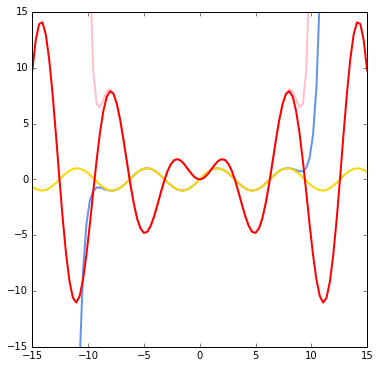

In [19]:
plt.figure(figsize=(6, 6))
axes = plt.gca()
axes.set_xlim([minX, maxX])
axes.set_ylim([minY, maxY])
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(xPix, sinyy(xPix), color='cornflowerblue', linewidth=linewidth, label="ground truth")
plt.plot(xPix, xsinyy(xPix), color='pink', linewidth=linewidth, label="ground truth")
plt.plot(xPix, np.sin(xPix), color='gold', linewidth=linewidth, label="ground truth")
plt.plot(xPix, xPix * np.sin(xPix), color='red', linewidth=linewidth, label="ground truth")
plt.show()

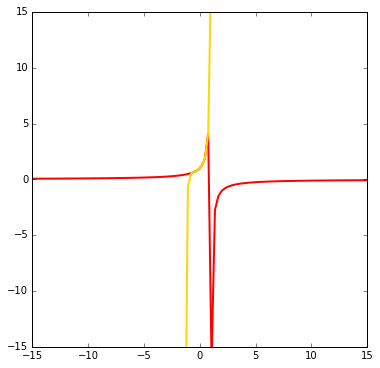

In [20]:
plt.figure(figsize=(6, 6))
axes = plt.gca()
axes.set_xlim([minX, maxX])
axes.set_ylim([minY, maxY])
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(xPix[:533], 1. /(1. - xPix[:533]), color='red', linewidth=linewidth, label="ground truth")
plt.plot(xPix[533:], 1. /(1. - xPix[533:]), color='cornflowerblue', linewidth=linewidth, label="ground truth")
plt.plot(xPix, OneOver(xPix), color='gold', linewidth=linewidth, label="ground truth")
plt.show()